In [2]:
import pandas as pd

In [4]:
log_file_path = '../nas_runs/evo_0.txt'

# Initialize lists to hold the extracted data
generations = []
max_loss = []
min_loss = []
avg_loss = []

with open(log_file_path, 'r') as file:
    for line in file:
        if line.startswith('###### Generation'):
            # Extract the generation number from the line
            generation_number = int(line.split()[2])
        if line.strip().startswith('0') and 'gen' not in line:
            # Split the line and extract max, min, and avg loss values
            _, _, avg, min_val, max_val = line.split()
            generations.append(generation_number)
            max_loss.append(float(max_val))
            min_loss.append(float(min_val))
            avg_loss.append(float(avg))

# Create a DataFrame from the extracted data
df_losses = pd.DataFrame({
    'Generation': generations,
    'Max Loss': max_loss,
    'Min Loss': min_loss,
    'Avg Loss': avg_loss
})

df_losses.head(50)

,Generation,Max Loss,Min Loss,Avg Loss
0,0,0.250,0.115,0.1708
1,1,0.177,0.096,0.1341
2,2,0.208,0.104,0.1440
3,3,0.187,0.107,0.1416
4,4,0.171,0.091,0.1182
5,5,0.147,0.091,0.1101
6,6,0.143,0.081,0.1049
7,7,0.100,0.081,0.0909
8,8,0.146,0.081,0.1111
9,9,0.236,0.110,0.1359


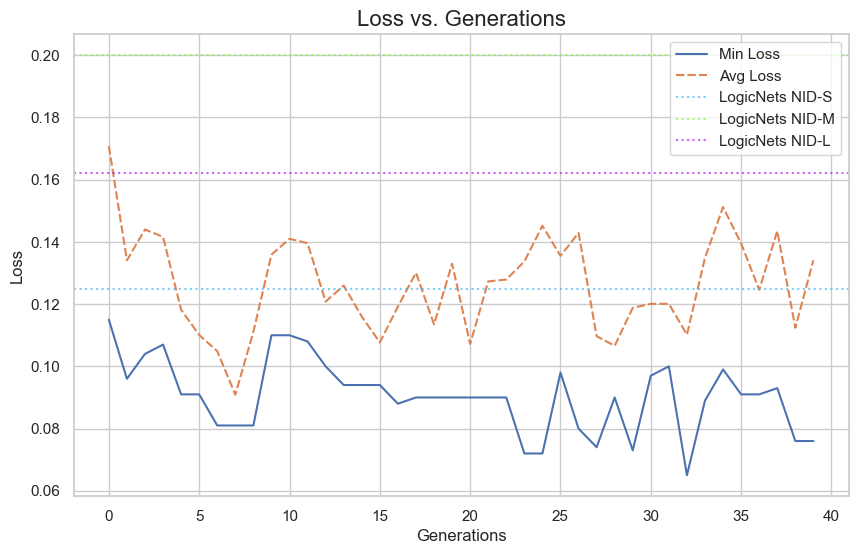

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(df_losses[["Min Loss", "Avg Loss"]])
plt.axhline(y=0.125, color='#42b9f5', linestyle='dotted', alpha=0.7, label="LogicNets NID-S")
plt.axhline(y=0.2, color='#84f542', linestyle='dotted', alpha=0.7, label="LogicNets NID-M")
plt.axhline(y=0.162, color='#ab22f0', linestyle='dotted', alpha=0.7, label="LogicNets NID-L")
plt.xlabel("Generations")
plt.ylabel("Loss")
plt.title("Loss vs. Generations", fontsize=16)
plt.legend(loc='upper right')